In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [5]:
df=pd.read_csv("1553768847-housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [8]:
df=df.dropna()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'Bedroom_ratio'}>,
        <Axes: title={'center': 'household_rooms'}>, <Axes: >]],
      dtype=object)

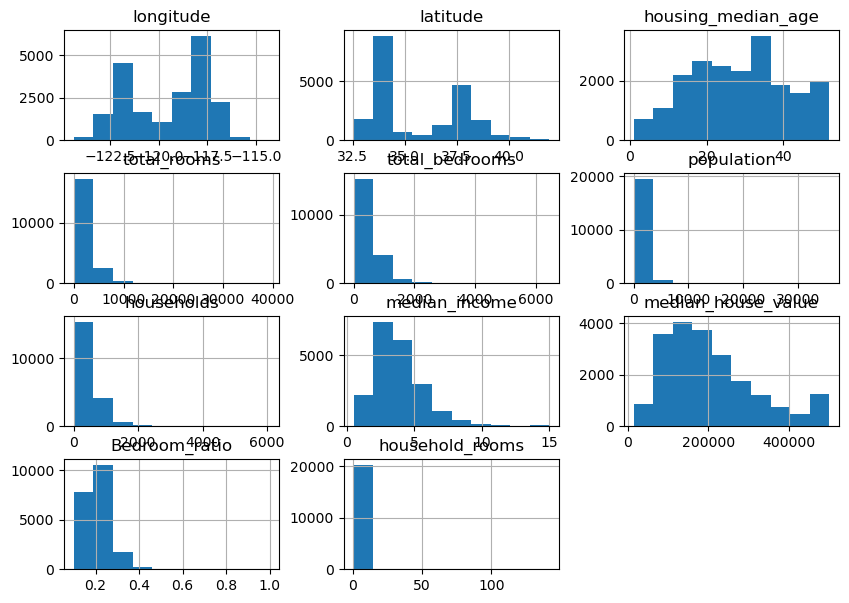

In [14]:
df.hist(figsize=(10,7))

<Figure size 1200x600 with 0 Axes>

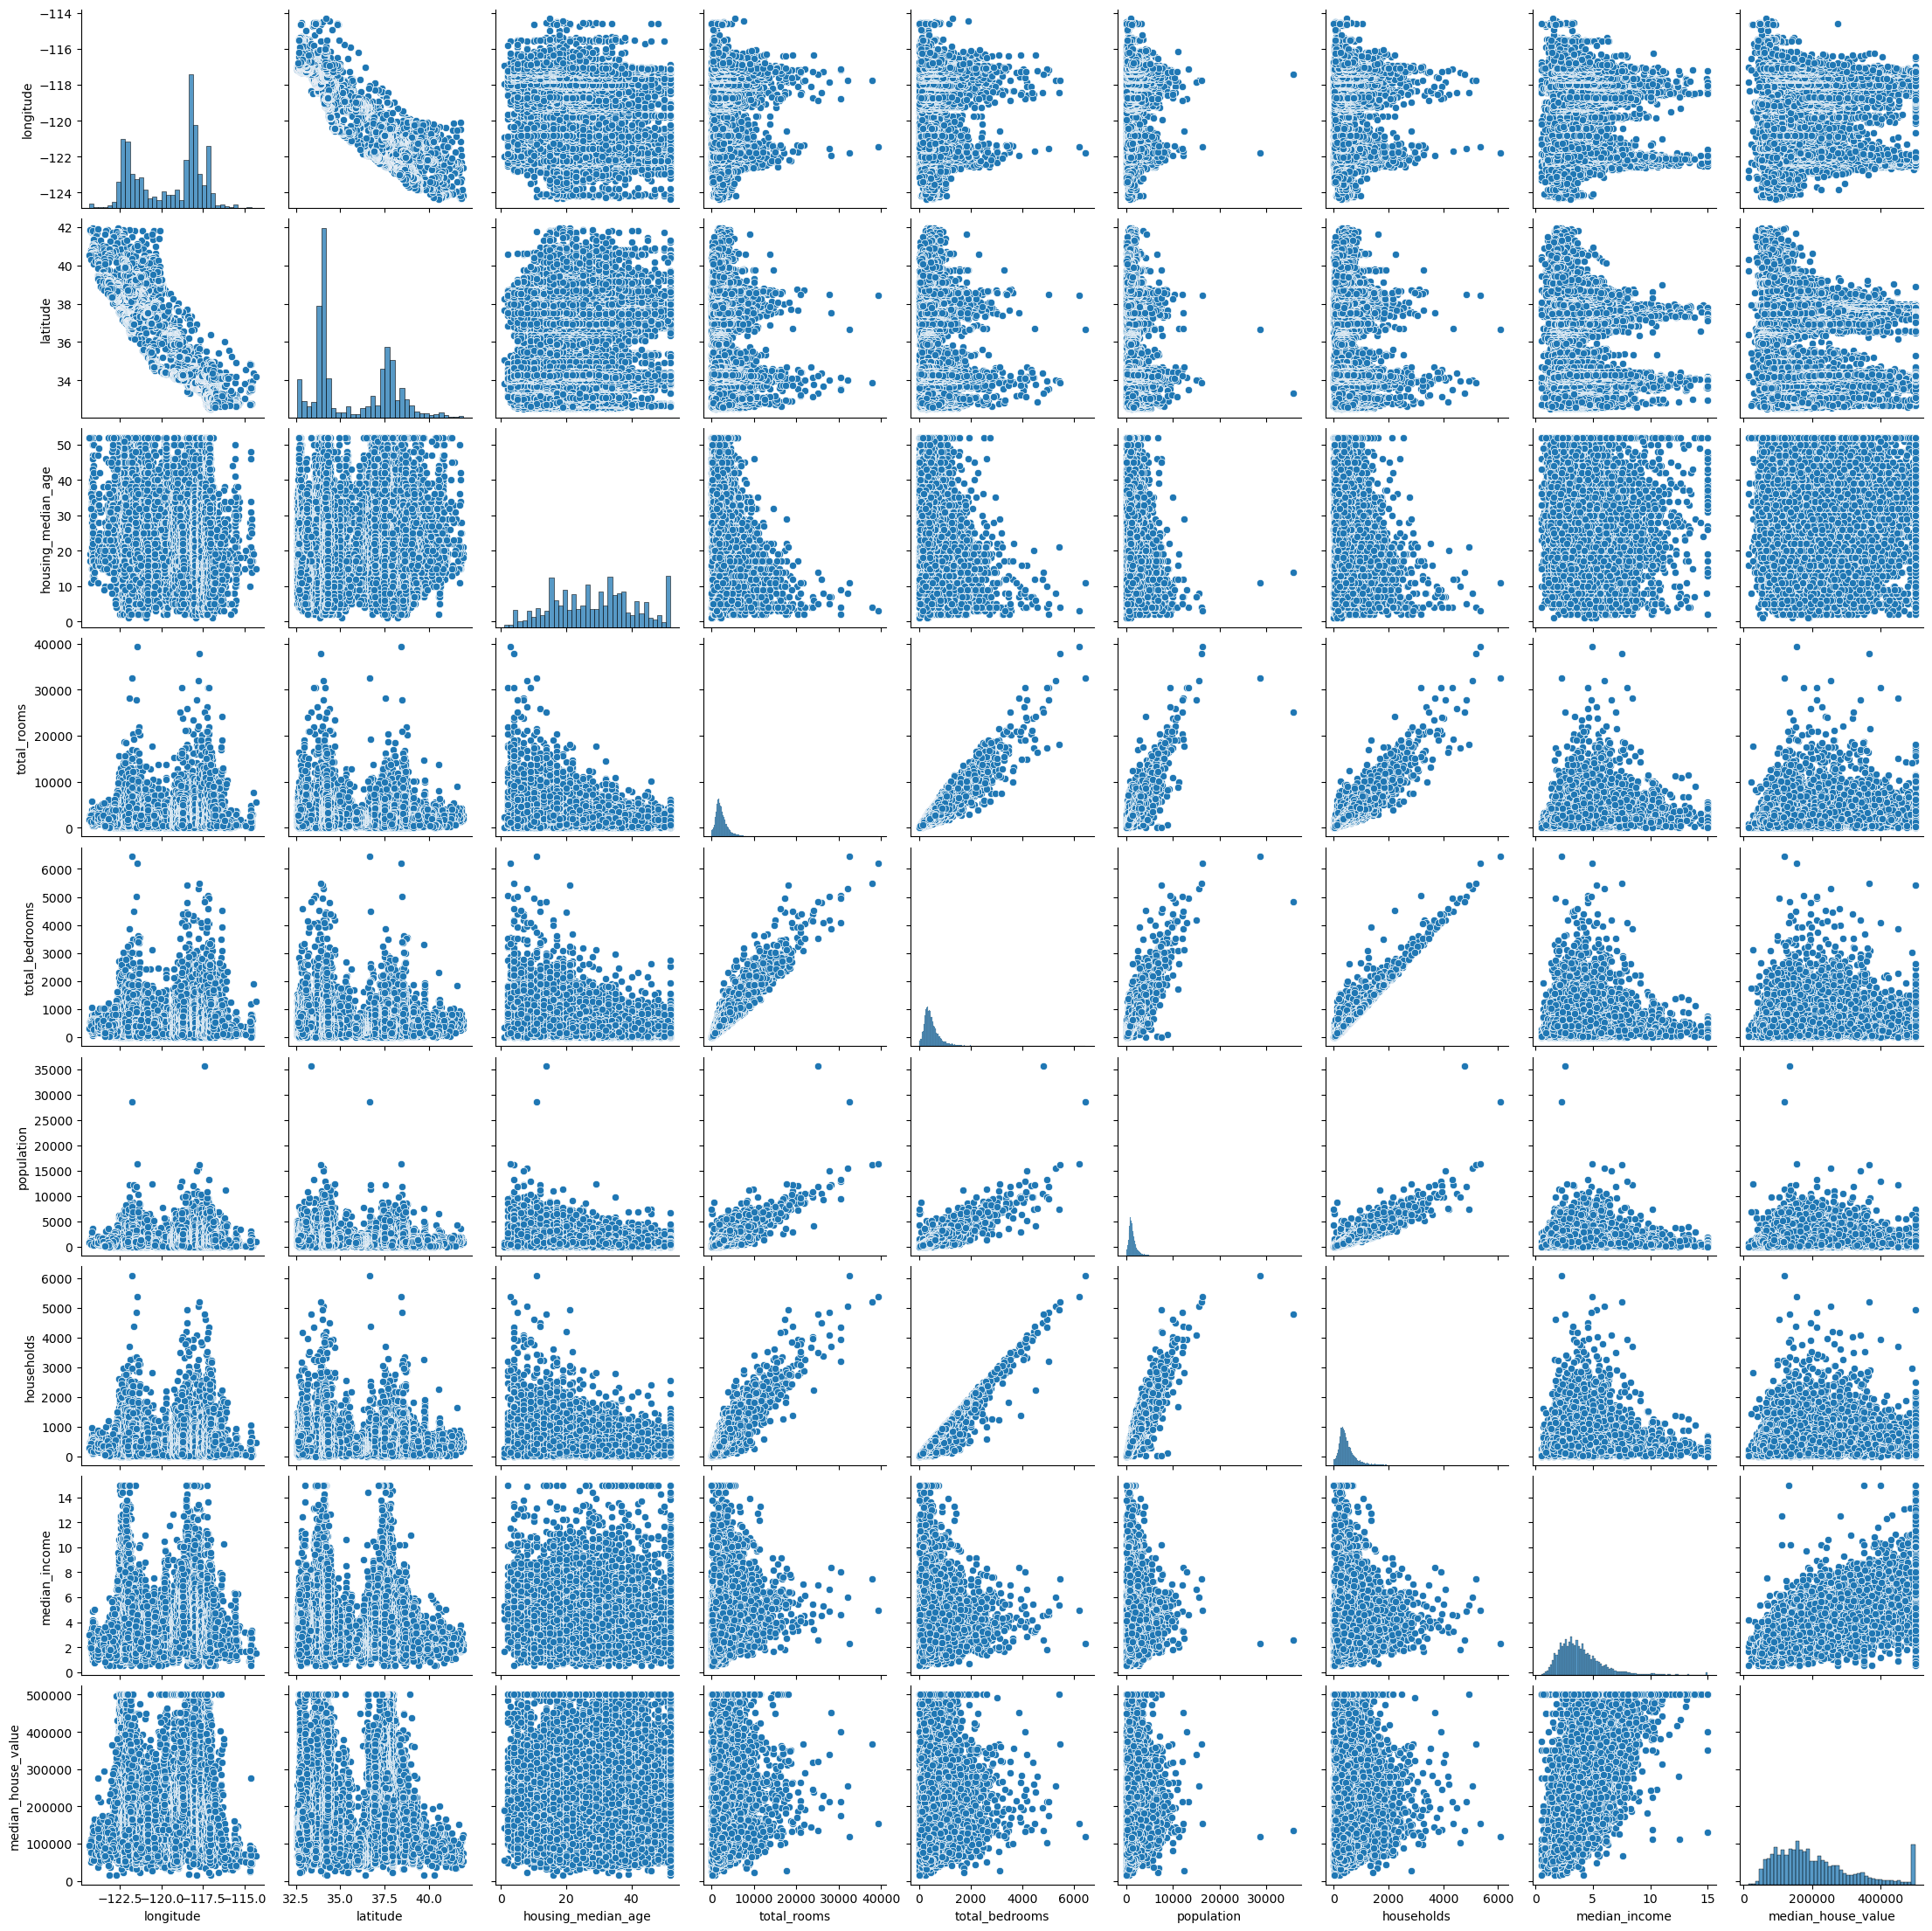

In [9]:
plt.figure(figsize=(12,6))
sns.pairplot(df)
plt.show()

In [11]:
df["Bedroom_ratio"]=df["total_bedrooms"]/df["total_rooms"]
df["household_rooms"]=df["total_rooms"]/df["households"]


<Axes: >

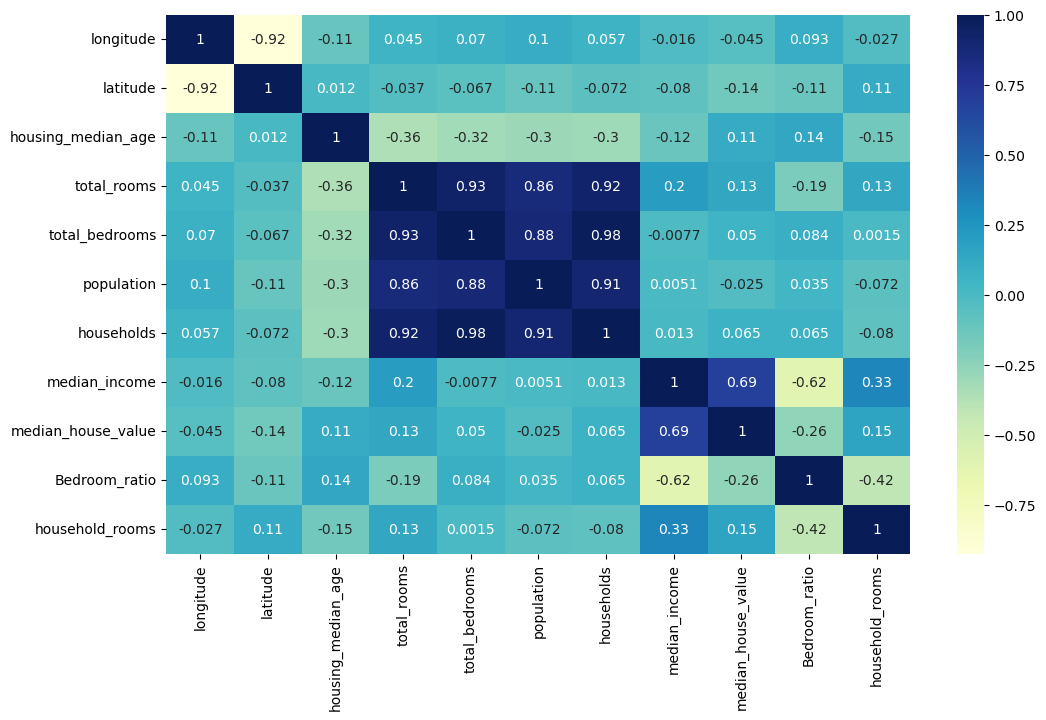

In [12]:
plt.figure(figsize=(12,7))
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot= True,cmap= "YlGnBu")

In [16]:
df["total_rooms"]= np.log(df["total_rooms"])+1
df["total_bedrooms"]= np.log(df["total_bedrooms"])+1
df["population"]= np.log(df["population"])+1
df["households"]= np.log(df["households"])+1

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'Bedroom_ratio'}>,
        <Axes: title={'center': 'household_rooms'}>, <Axes: >]],
      dtype=object)

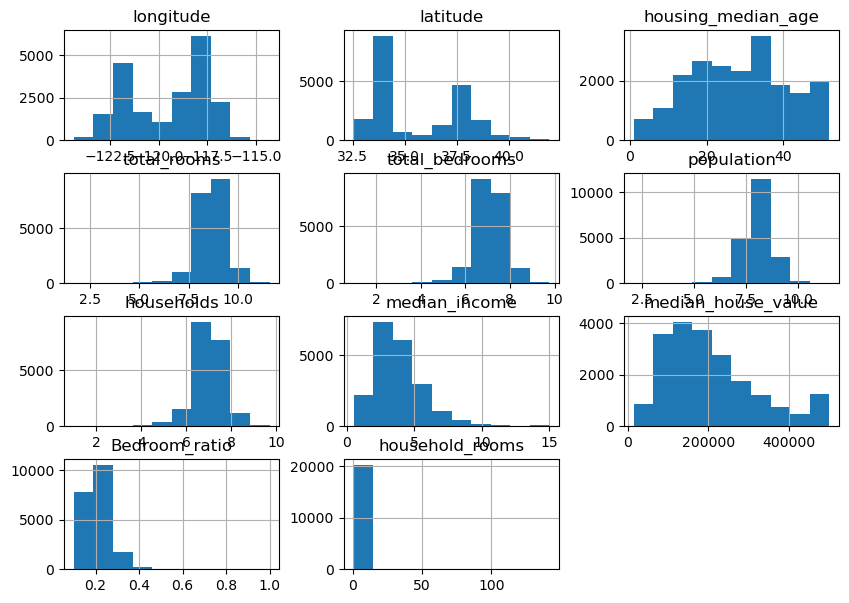

In [18]:
df.hist(figsize=(10,7))

In [ ]:
correlation_matrix= df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix,annot= True,cmap="YlGnBu")
plt.show()

In [ ]:
X=df[['housing_median_age','total_bedrooms','total_rooms']]
y=df['median_income']

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= 0.2,random_state=42)

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
#Mean Squared Error(MSE)
mse= mean_squared_error(y_test,y_pred)
print(f"mean squared error(MSE):{mse}")

#R-squared Error(R**2)
r2=r2_score(y_test,y_pred)
print(f"R-squared error(R2):{r2}")

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual vs Predicted house prices')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled= scaler.fit_transform(X)

In [ ]:
from scipy import stats
z_scores= stats.zscore(X)
z_scores

In [ ]:
df_no_outliers= df[(np.abs(z_scores)<3).all(axis=1)]

In [ ]:
X=df_no_outliers[['housing_median_age','total_bedrooms','total_rooms']]
y=df_no_outliers['median_income']

In [ ]:
X_scaled=scaler.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size= 0.2,random_state=42)

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
#Mean Squared Error(MSE)
mse= mean_squared_error(y_test,y_pred)
print(f"mean squared error(MSE):{mse}")

#R-squared Error(R**2)
r2=r2_score(y_test,y_pred)
print(f"R-squared error(R2):{r2}")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model= RandomForestRegressor(n_estimators= 100,random_state=42)
rf_model.fit(X_train,y_train)

In [ ]:
rf_pred= rf_model.predict(X_test)
rf_pred

In [ ]:
#Mean Squared Error(MSE)
mse= mean_squared_error(y_test,rf_pred)
print(f"mean squared error(MSE):{mse}")

#R-squared Error(R**2)
r2=r2_score(y_test,rf_pred)
print(f"R-squared error(R2):{r2}")

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model= xgb.XGBRegressor(objective='reg:squarederror',n_estimators=100,random_state=42)
xgb_model.fit(X_train,y_train)

In [ ]:
xgb_pred=xgb_model.predict(X_test)

In [ ]:
#Mean Squared Error(MSE)
mse= mean_squared_error(y_test,xgb_pred)
print(f"mean squared error(MSE):{mse}")

#R-squared Error(R**2)
r2=r2_score(y_test,xgb_pred)
print(f"R-squared error(R2):{r2}")

In [ ]:
pip install joblib

In [ ]:
import joblib

In [ ]:
joblib.dump(xgb_model,'xgboost_house_price_model.pkl')

In [ ]:
loaded_model=joblib.load('xgboost_house_price_model.pkl')

In [ ]:
y_new_pred=loaded_model.predict(X_test)